<a href="https://colab.research.google.com/github/TonteInafa/CODSOFT/blob/main/Titanicsurvivalprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Input the file path to the Titanic dataset
file_path = '/content/drive/MyDrive/Titanicproject/Titanic-Dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)


In [ ]:
# Replacing the path with the actual path to the dataset in my Drive
data_path = '/content/drive/MyDrive/Titanicproject/Titanic-Dataset.csv'

# Loading the Titanic dataset
# I am loading the dataset and examining its structure to get an overview.
data = pd.read_csv("/content/drive/MyDrive/Titanicproject/Titanic-Dataset.csv")

# Preview the first few rows
#This is to assess the structure of the data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [ ]:
# Using Exploratory Data Analysis (EDA)
# Checking for the missing values
print(df.isnull().sum())

# Displaying the dataset information
print(df.info())

# Getting basic statistical Information
print(df.describe())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [ ]:
# Data Cleaning and Preprocessing
# Fill missing Age with median
# I noticed the 'age' had some missing values which i replaced with the median to avoid being influenced by very young or old passengers
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Check for missing values in the 'Embarked' column
print(df['Embarked'].isnull().sum())

# Get the mode of the 'Embarked' column (most frequent value)
mode_embarked = df['Embarked'].mode()

# Check if mode is empty (in rare cases, the mode might not exist)
if not mode_embarked.empty:
    # Fill missing values with the most frequent value (mode)
    df['Embarked'].fillna(mode_embarked[0], inplace=True)
else:
    print("No mode value found in 'Embarked' column.")

# Drop Cabin column if it exists
# Dropping the 'Cabin' column due to too many missing values and lack of relevance for now
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])


891
No mode value found in 'Embarked' column.


In [ ]:
# Using Feature Engineering
# I’ll convert categorical columns like 'Sex' and 'Embarked' into numeric values (encoding them).
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert Gender to binary

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert Embarked to numeric


In [ ]:
# Selecting the features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]  # Independent variables
y = df['Survived']  # Dependent variable (Target)

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# I chose Random Forest because it works well with both numerical and categorical data and can handle missing values better.
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
# Making predictions on the test set
y_pred = rf_model.predict(X_test)


In [ ]:
# Model Evaluation
# Evaluating the model's performance by calculating accuracy and creating a confusion matrix
print("\nAccuracy of the model:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Displaying a classification report to understand precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the model:
0.8268156424581006

Confusion Matrix:
[[91 14]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# Checking the Feature Importance
# Checking which features had the most influence on the predictions
# This can give us insight into what factors affected a passenger's survival probability.
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sorting the features by their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Displaying the top 5 important features
print("\nTop 5 Important Features for Predicting Survival:")
print(feature_importance.head())



Top 5 Important Features for Predicting Survival:
  Feature  Importance
1     Sex    0.269133
5    Fare    0.266097
2     Age    0.251642
0  Pclass    0.084291
3   SibSp    0.052561


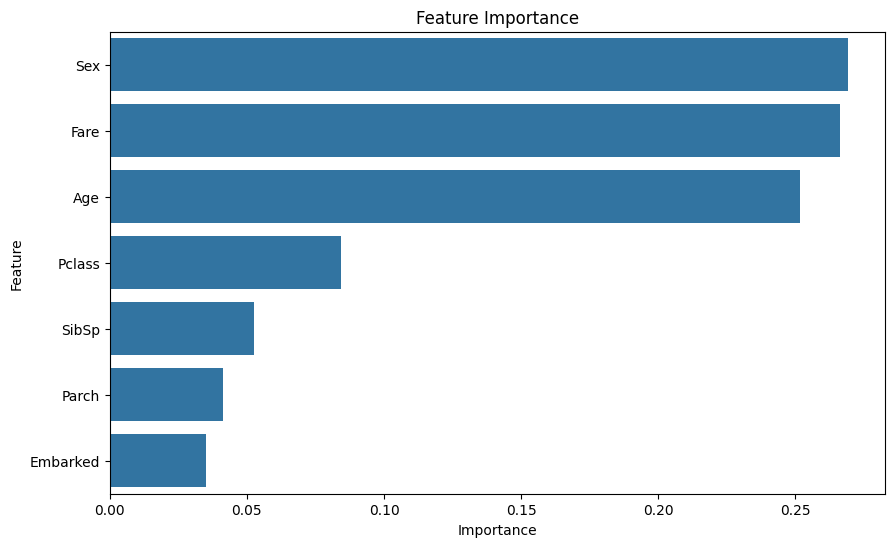

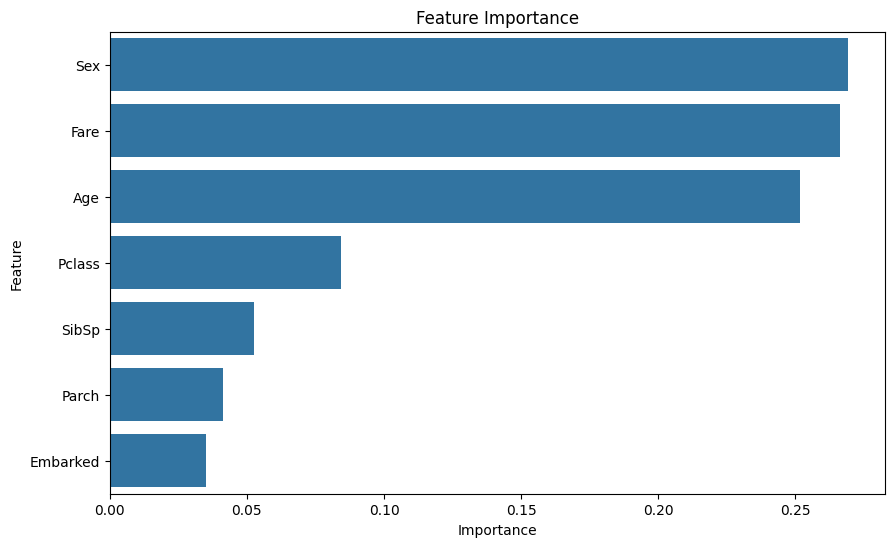

In [ ]:
# Data Visualization
# Visualizing the feature importance for a better understanding
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()